![](https://mp.weixin.qq.com/s/032Ywb8PCGlvCEYvt5qlkA)
[The hacker's guide to uncertainty estimates](https://erikbern.com/2018/10/08/the-hackers-guide-to-uncertainty-estimates.html)

In [1]:
import numpy
import random
import datetime

In [4]:
def generate_time_series(k=200,m=1000,sigma=100,n=50,
                        start_date=datetime.date(2017,7,1)):
    xs = numpy.linspace(0,1,n,endpoint = False)
    ys = [k*x + m + random.gauss(0,sigma) for x in xs]
    ts = [start_date + datetime.timedelta(x)*365 for x in xs]
    x_scale = numpy.linspace(-1,2,500)
    t_scale = [start_date + datetime.timedelta(x)*365 for x in x_scale]
    return xs,ys,ts,x_scale,t_scale

xs,ys,ts,x_scale,t_scale = generate_time_series()

Text(0, 0.5, 'Weight of elephant(kg)')

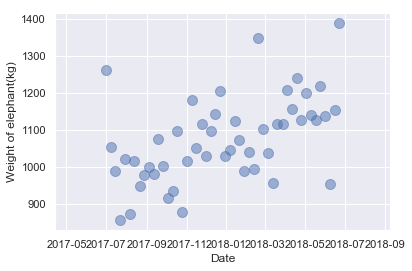

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

plt.scatter(ts,ys,alpha=0.5,s=100)
plt.xlabel('Date')
plt.ylabel('Weight of elephant(kg)') 

> Êï∞ÊçÆÂàÜÂ∏É‰∏é‰∏çÁ°ÆÂÆöÊÄß

‰πãÂâçÊàë‰∏ÄÁõ¥Êêû‰∏çÊ∏Ö‚Äú‰∏çÁ°ÆÂÆöÊÄß‚ÄùÁöÑÊÑèÊÄùÔºå‰ΩÜÊàëËÆ§‰∏∫ÊêûÊ∏ÖÊ•öËøô‰∏ÄÁÇπÈùûÂ∏∏ÈáçË¶Å„ÄÇÊàë‰ª¨ÂèØ‰ª•‰∏∫Â§öÁßç‰∏çÂêåÁöÑÊï∞ÊçÆ‰º∞ÁÆóÂàÜÂ∏ÉÔºö

1. Êï∞ÊçÆÊú¨Ë∫´„ÄÇÁªôÂÆö‰∏ÄÂÆöÁöÑÊó∂Èó¥ËåÉÂõ¥Ôºàt Ôºåt 'ÔºâÔºåÂú®Ëøô‰∏™Êó∂Èó¥Èó¥ÈöîÂÜÖÂ§ßË±°‰ΩìÈáçÁöÑÂàÜÂ∏ÉÊòØ‰ªÄ‰πàÔºü

2. Êüê‰∫õÂèÇÊï∞ÁöÑ‰∏çÁ°ÆÂÆöÊÄß„ÄÇÂ¶ÇÂèÇÊï∞kÂú®Á∫øÊÄßÂÖ≥Á≥ªy = k t + mÈáåÔºåÊàñËÄÖÊüê‰∫õ‰º∞ÁÆóÂô®ÁöÑ‰∏çÁ°ÆÂÆöÊÄßÔºåÂ∞±ÂÉèËÆ∏Â§öËßÇÊµãÂÄºÁöÑÂπ≥ÂùáÂÄº‰∏ÄÊ†∑„ÄÇ

3. È¢ÑÊµãÊï∞ÂÄºÁöÑ‰∏çÁ°ÆÂÆöÊÄß„ÄÇÂõ†Ê≠§ÔºåÂ¶ÇÊûúÊàë‰ª¨È¢ÑÊµãÊó•Êúü‰∏∫tÔºàÂèØËÉΩÂú®Êú™Êù•ÔºâÊó∂Â§ßË±°ÁöÑÈáçÈáèÊòØyÂÖ¨Êñ§ÔºåÊàë‰ª¨ÊÉ≥Áü•ÈÅìÊï∞ÈáèyÁöÑ‰∏çÁ°ÆÂÆöÊÄß„ÄÇ

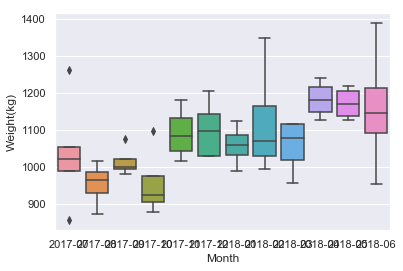

In [18]:
import pandas as pd
d = pd.DataFrame({'x':xs,'t':ts,'Weight(kg)':ys})
d['Month'] = d['t'].apply(lambda t: t.strftime('%Y-%m'))
sns.boxplot(data=d,x='Month',y='Weight(kg)')

`ËÆ°ÁÆóÂùáÂÄºÁöÑ‰∏çÁ°ÆÂÆöÊÄß - Ê≠£ÊÄÅÂàÜÂ∏É`

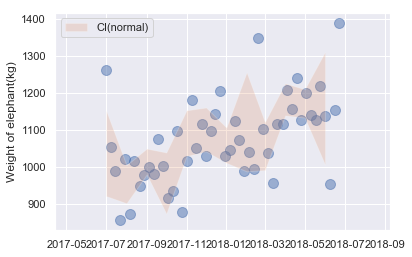

In [31]:
def plot_CI(obs_by_group):
    groups = list(sorted(obs_by_group.keys()))
    lo_bound = []
    hi_bound = []
    for group in groups:
        series = obs_by_group[group]
        mu,std,n = numpy.mean(series),numpy.std(series),len(series)
        lo_bound.append(mu - 1.96*std*n**-0.5)
        hi_bound.append(mu + 1.96*std*n**-0.5)
    plt.fill_between(groups,lo_bound,hi_bound,alpha=0.2,label='CI(normal)')

plt.scatter(ts,ys,alpha=0.5,s=100)
obs_by_month = {}
for month,y in zip(d['Month'],d['Weight(kg)']):
    obs_by_month.setdefault(month,[]).append(y)

plot_CI(obs_by_month)
plt.ylabel('Weight of elephant(kg)')
plt.legend()

`ÊâÄÊúâÁªìÊûú‰∏∫0Êàñ1Êó∂ÁöÑÁΩÆ‰ø°Âå∫Èó¥`

In [36]:
STATES = ['CA', 'NY', 'FL', 'TX', 'PA', 'IL', 'OH']
GROUPS = ['test', 'control']

def generate_binary_categorical(states=STATES, groups=GROUPS, k=400,
                                zs=[0, 0.2], z_std=0.1, b=-3, b_std=1):
    output = {}
    e_obs_per_state = numpy.random.exponential(k,size=len(states))
    state_bias = numpy.random.normal(b,b_std,size=len(states))
    for groups,z in zip(groups,zs):
        noise = numpy.random.normal(z,z_std,size=len(states))
        ps = 1 / (1 + numpy.exp(-(state_bias + noise)))
        ns =numpy.random.poisson(e_obs_per_state)
        ks = numpy.random.binomial(ns,ps)
        output[groups] = (ns,ks)
    return output

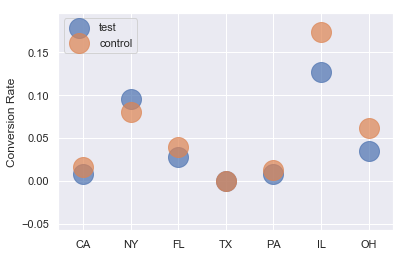

In [37]:
data = generate_binary_categorical()
for group, (ns,ks) in data.items():
    plt.scatter(STATES,ks/ns,label=group,alpha=0.7,s=400)
plt.ylabel("Conversion Rate")
plt.legend()

```python

n, k = 100, 3

scipy.stats.beta.ppf([0.025, 0.975], k, n-k)

array([0.00629335, 0.07107612])
```

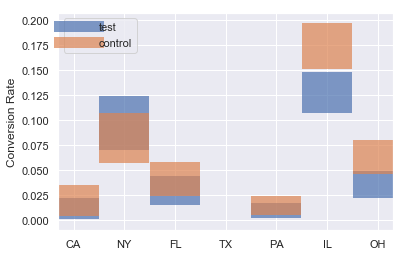

In [39]:
import scipy as scipy

for group,(ns,ks) in data.items():
    lo = scipy.stats.beta.ppf(0.025,ks,ns-ks)
    hi = scipy.stats.beta.ppf(0.975,ks,ns-ks)
    mean = ks/ns
    plt.errorbar(STATES,y=mean,yerr = [mean-lo,hi-mean],
                label=group,alpha=0.7,linewidth=0,elinewidth=50)
    
plt.ylabel('Conversion Rate')
plt.legend()

üìù
`TBD`
Some example of A/B test from Book [TableauÂïÜ‰∏öÂàÜÊûê‰ªéÊñ∞ÊâãÂà∞È´òÊâã](https://www.amazon.cn/dp/B07D55HVL3/ref=sr_1_2?ie=UTF8&qid=1544511736&sr=8-2&keywords=tableau)


In [1]:
import sys,os
os.getcwd()
os.chdir('C:\\Users\\randa\\Desktop\\JupyterNote\\Python\\PyPrac\\Á¨¨10Á´†')

In [2]:
import numpy as np
import pandas as pd

df_sales = pd.read_csv(r'sales.csv',encoding = 'utf-8')
df_test = pd.read_excel(r'test.xlsx',encoding='utf-8')
df = pd.merge(df_sales,df_test,on='Store_ID')
df.head()

Store_ID Week_Ending  Gross_Rev  Test_label Group_label
0     S001    2010/1/2   59685.01           0         NaN
1     S001    2010/1/9   24946.82           0         NaN
2     S001   2010/1/16   26096.93           0         NaN
3     S001   2010/1/23   24475.04           0         NaN
4     S001   2010/1/30   29825.45           0         NaN

In [3]:
df['Week_Ending'] = pd.to_datetime(df['Week_Ending'])
df['Test_duration'] = np.where(df['Week_Ending']>'2011-10-08',1,0)

In [120]:
df[df['Test_label']==1].pivot_table(values='Gross_Rev',index='Store_ID',columns='Test_duration')

Test_duration             0             1
Store_ID                                 
S027           73080.882581  87441.343478
S029           65101.063333  72233.871739
S035           55056.898065  59192.042174
S037           57839.269462  72874.807826
S044           62104.330108  72869.933913
S049           58574.878925  62091.186087
S063           52720.998817  57876.811304
S073           72112.395054  78429.596087
S082           60403.125376  69726.891739

In [122]:
# df[df['Test_label']==1].groupby(['Store_ID', 'Test_duration'])['Gross_Rev'].aggregate('mean').unstack()

In [9]:
plt_1 = df[df['Test_label']==1].pivot_table(values='Gross_Rev',index=['Store_ID','Test_duration'])
plt_1 = pd.DataFrame(plt_1)
plt_1 = plt_1.reset_index(level=['Store_ID','Test_duration'])
plt_1.head()

Store_ID  Test_duration     Gross_Rev
0     S027              0  73080.882581
1     S027              1  87441.343478
2     S029              0  65101.063333
3     S029              1  72233.871739
4     S035              0  55056.898065

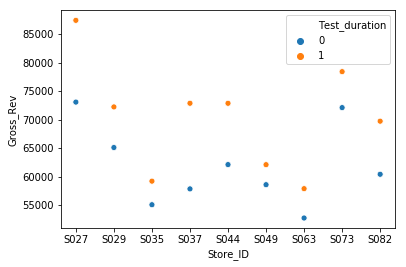

In [10]:
%matplotlib inline
# import matplotlib.pyplot as plt
import seaborn as sns; sns.set

sns.scatterplot(x='Store_ID',y='Gross_Rev',data=plt_1, hue='Test_duration')

> È¶ñÂÖàËßÇÂØüÊµãËØïÂ∫óÈì∫Âú®ÊµãËØïÊúüÂâçÂêéÁöÑÈîÄÈáèÊÉÖÂÜµ„ÄÇÊ©ôËâ≤ÊòØÊµãËØïÊúüÈó¥Â∫óÈì∫ÁöÑ"Âë®Âπ≥ÂùáÈîÄÂîÆÈ¢ù"ÔºåËìùËâ≤‰∏∫ÊµãËØï‰πãÂâçÁöÑ‰∏ÄÊÆµÊó∂ÊúüÂ∫óÈì∫ÁöÑ"Âë®Âπ≥ÂùáÈîÄÂîÆÈ¢ù"„ÄÇÂèØ‰ª•ÁúãÂà∞ÔºåÊâÄÊúâÊµãËØïÂ∫óÈì∫ÊµãËØïÊúüÈó¥ÁöÑÈîÄÂîÆÈ¢ùÈÉΩÊØîÊµãËØïÂâçÊúâÊâÄÊèêÂçáÔºå‰ΩÜÊàë‰ª¨Ëøò‰∏çËÉΩÂÆåÂÖ®Á°ÆÂÆöÊòØÁî±‰∫éÈááÁî®Êñ∞Ëê•ÈîÄÊñπÊ≥ïÂ∏¶Êù•ÁöÑÈîÄÂîÆÊèêÂçáÔºåËøòÊòØÂèØ**ÂàöÂ•Ω**ÊµãËØïÂâçÂêéÊúüÈó¥Êï¥‰ΩìÂ∏ÇÂú∫Áä∂ÂÜµÁöÑÊîπÂèòÂ∏¶Êù•‰∫ÜÈîÄÂîÆÊÉÖÂÜµÁöÑÂèòÂåñ„ÄÇ

In [7]:
plt_2 = df.pivot_table(index=['Store_ID','Test_duration'],values='Gross_Rev')
plt_2 = pd.DataFrame(plt_2)
plt_2 = plt_2.reset_index(level=['Test_duration'])
plt_2.head()

Test_duration     Gross_Rev
Store_ID                             
S001                  0  38823.417312
S001                  1  38260.004783
S002                  0  58632.199677
S002                  1  63700.656957
S003                  0  69467.889570

d:\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


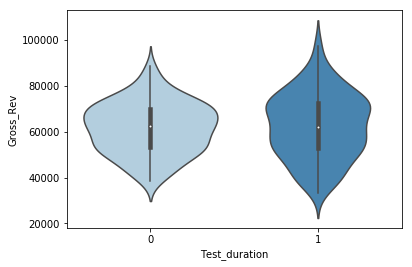

In [21]:
# sns.boxplot(x = 'Test_duration',y = 'Gross_Rev',data=plt_2)
# sns.swarmplot(x="Test_duration", y="Gross_Rev", data=plt_2, color=".3", linewidth=0)
sns.violinplot('Test_duration','Gross_Rev',data=plt_2, palette="Blues")

In [26]:
df[df.Group_label.notnull()].head()

Store_ID Week_Ending  Gross_Rev  Test_label Group_label  Test_duration
1392     S013  2010-01-02   67975.60           0        S063              0
1393     S013  2010-01-09   34475.00           0        S063              0
1394     S013  2010-01-16   33501.27           0        S063              0
1395     S013  2010-01-23   35168.84           0        S063              0
1396     S013  2010-01-30   45957.85           0        S063              0

In [37]:
plt_3 = df[df.Group_label=='S027'].pivot_table(index=['Group_label','Store_ID','Week_Ending'],values='Gross_Rev')
plt_3 = pd.DataFrame(plt_3).reset_index(level=['Week_Ending','Group_label','Store_ID'])
plt_3.head()

Group_label Store_ID Week_Ending  Gross_Rev
0        S027     S026  2010-01-02   29204.46
1        S027     S026  2010-01-09   44417.73
2        S027     S026  2010-01-16   63774.08
3        S027     S026  2010-01-23   67201.40
4        S027     S026  2010-01-30   65992.43

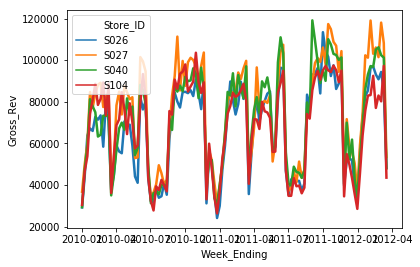

In [40]:
# sns.lineplot(data=plt_3,x='Week_Ending',y='Gross_Rev',hue='Store_ID')
sns.lineplot(data=plt_3,x='Week_Ending',y='Gross_Rev',hue='Store_ID',palette="tab10", linewidth=2.5)

In [86]:
plt_4 = df[df.Group_label=='S029'].pivot_table(index = ['Group_label','Store_ID'],columns = 'Test_duration',values = 'Gross_Rev')
plt_4 = pd.DataFrame(plt_4).reset_index(level=['Group_label','Store_ID'])
plt_4['Variance'] = (plt_4.loc[:,1] - plt_4.loc[:,0]) / plt_4.loc[:,0]
plt_4

Test_duration Group_label Store_ID             0             1  Variance
0                    S029     S024  75436.367634  81373.583043  0.078705
1                    S029     S029  65101.063333  72233.871739  0.109565
2                    S029     S052  43437.957419  41541.221739 -0.043665
3                    S029     S071  67105.499892  68502.206087  0.020814

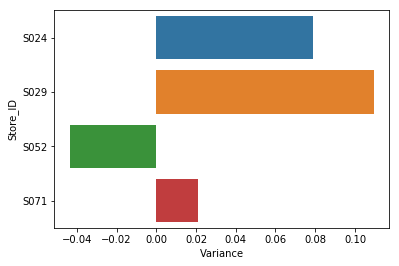

In [87]:
sns.barplot(x='Variance',y='Store_ID',data=plt_4)

üìù TBD Some example of ANOVA from Book [R in Action](http://www.ituring.com.cn/book/tupubarticle/9812)

In [110]:
#change kernel to R
library(xlsx)
df_1 <- read.table('C:/Users/randa/Desktop/JupyterNote/Python/PyPrac/Á¨¨10Á´†/sales.csv',header = T,sep = ',')
df_2 <- read.xlsx2('C:/Users/randa/Desktop/JupyterNote/Python/PyPrac/Á¨¨10Á´†/test.xlsx', 1)
# df_2[df_2$Group_label=="",3]  = NA #***#

In [111]:
df <- merge(df_1,df_2,by=c("Store_ID"),all.x = T,incomparables = NA)
head(df)

Store_ID Week_Ending Gross_Rev Test_label Group_label
1 S001     2010/1/2    59685.01  0                     
2 S001     2012/2/4    34113.41  0                     
3 S001     2010/7/17   48113.84  0                     
4 S001     2011/7/23   40250.44  0                     
5 S001     2012/1/28   28582.40  0                     
6 S001     2010/7/10   49727.12  0

In [112]:
df$Week_Ending <- as.Date(df$Week_Ending)
df$Test_duration <- ifelse(df$Week_Ending >'2011-10-08',1,0)

In [113]:
head(df)

Store_ID Week_Ending Gross_Rev Test_label Group_label Test_duration
1 S001     2010-01-02  59685.01  0                      0            
2 S001     2012-02-04  34113.41  0                      1            
3 S001     2010-07-17  48113.84  0                      0            
4 S001     2011-07-23  40250.44  0                      0            
5 S001     2012-01-28  28582.40  0                      1            
6 S001     2010-07-10  49727.12  0                      0

`Âê´ÁªÑÈó¥ÂíåÁªÑÂÜÖÂõ†Â≠êÁöÑÂèåÂõ†Á¥†ÊñπÂ∑ÆÂàÜÊûê`
> ***This A/B testing is kinda awkward***

In [114]:
library(reshape2) 
dcast(df[df$Group_label=='S027',], Group_label + Test_label + Store_ID ~ Test_duration, value.var = "Gross_Rev", mean)

Group_label Test_label Store_ID 0        1       
1 S027        0          S026     65262.55 75239.75
2 S027        0          S040     69671.50 81946.04
3 S027        0          S104     67994.47 71252.16
4 S027        1          S027     73080.88 87441.34

`Reference`

- [Calculations for A/B Tests in R](https://www.r-bloggers.com/quick-significance-calculations-for-a-b-tests-in-r/)
- [Big Data Solutions: A/B t test](https://www.r-bloggers.com/big-data-solutions-ab-t-test/)
- [Tips for A/B Testing with R](https://www.r-bloggers.com/tips-for-ab-testing-with-r/)
- [Bayesian A/B Testing Made Easy](https://www.r-bloggers.com/bayesian-ab-testing-made-easy/)
- [New Course: A/B Testing in R](https://www.r-bloggers.com/new-course-a-b-testing-in-r/)
- [A/B testing advertisements with R](https://www.r-bloggers.com/ab-testing-advertisements-with-r/)